In [7]:
import pandas as pd
import numpy as np
from ak_pynn.mlp import MLP

In [20]:
import seaborn as sns

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')
df.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
trns = scaler.fit_transform(df.iloc[:, 0:4])
X=trns
Y=pd.get_dummies(df.iloc[:,4]).values

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 4)          0       
        -------------------------------------------------------------------

         BatchNormalization       None        (None, 4)          16      
        -------------------------------------------------------------------

               Dense             linear       (None, 10)         50      
        -------------------------------------------------------------------

         BatchNormalization       None        (None, 10)         40      
        -------------------------------------------------------------------

               Dense             linear       (None, 10)        110      
        -------------------------------------------------------------------

               Output           softmax       (None, 3)          33      
        ----

Training progress :: 100%|██████████| 200/200 [00:01<00:00, 104.85it/s, Loss: 0.02077 - mse: 0.02077 - accuracy: 0.97222 - val_loss: 0.00444 - val_mse: 0.00444 - val_accuracy: 1.00000]



Minimised Loss : 0.02076959, Training metrics : {'mse': 0.02076959, 'accuracy': 0.97222222} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00791 seconds
========================================================================= :)


{'accuracy': 0.9555555555555556,
 'precision': 0.9333333333333333,
 'macro_recall': 0.9333333333333332}

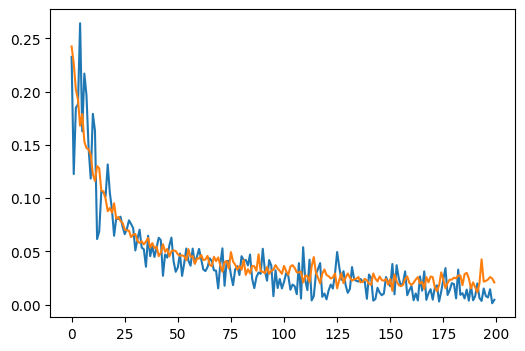

In [27]:
model = MLP()
model.add_layer(4,input_layer=True,batch_norm=True)
model.add_layer(10,activation_function='linear',batch_norm=True)
model.add_layer(10,activation_function='linear')
model.add_layer(3,activation_function='softmax',output_layer=True)
model.compile_model(loss_function='mse',metrics=['mse','accuracy'])
model.fit(X_train, Y_train,epochs=200,verbose=False,patience=3,validation_split=0.2)
plt.plot(model.history['Val_Losses'])
plt.plot(model.history['Losses'])
model.predict_scores(X_test,Y_test,metrics=['accuracy','precision','macro_recall'])


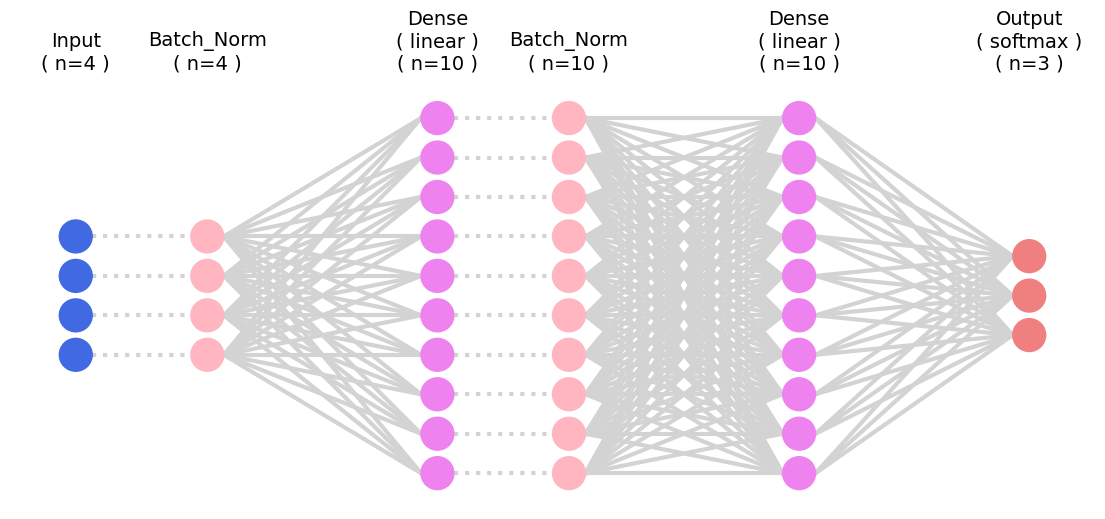

In [31]:
model.visualize()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 233
Trainable params: 213
Non-trainable params: 20
_________________________________________________________________
1/1 [==============================] - 0s 122ms/step


0.9333333333333333

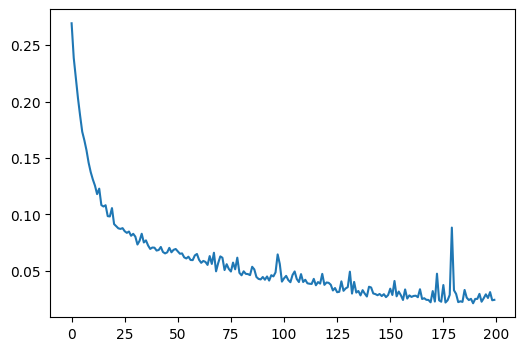

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
model = Sequential()
model.add(Dense(10, activation='linear', input_dim=4))
model.add(BatchNormalization())
model.add(Dense(10, activation='linear'))
model.add(Dense(3, activation='softmax'))
model.compile(loss="mse", metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=200,verbose=0,validation_split=0.2)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)